# Importing Libraries and loading dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [9]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [10]:
df['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

# Exploratory Data Analysis (EDA)

In [11]:
Category = df['Category'].value_counts().reset_index()
Category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


<Axes: xlabel='count', ylabel='Category'>

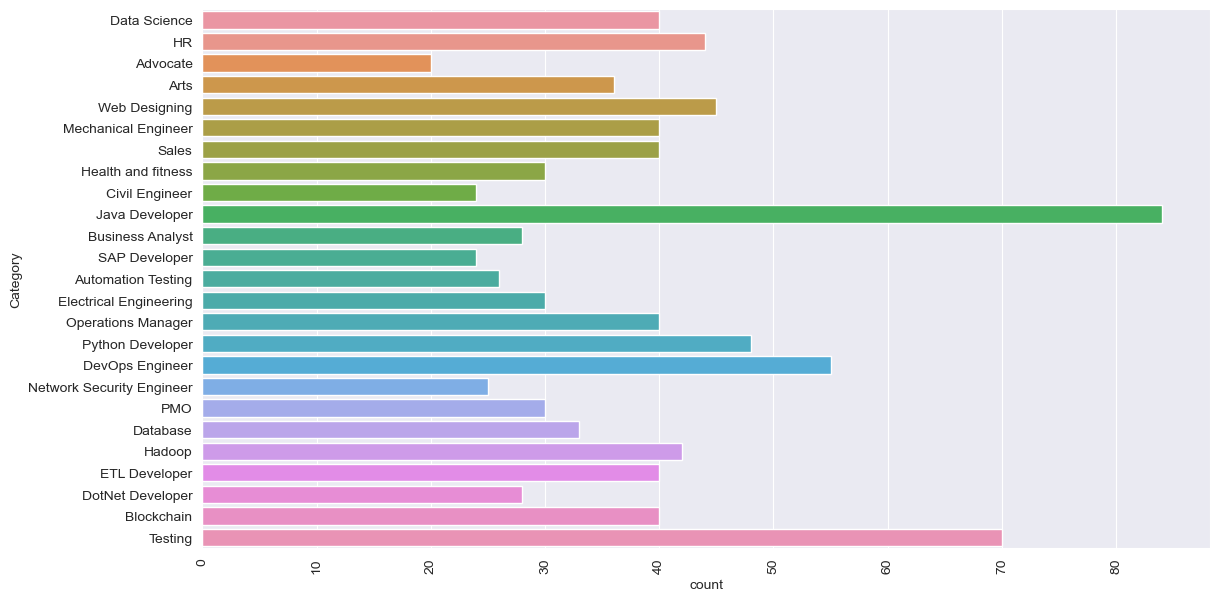

In [12]:
plt.figure(figsize=(13,7))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

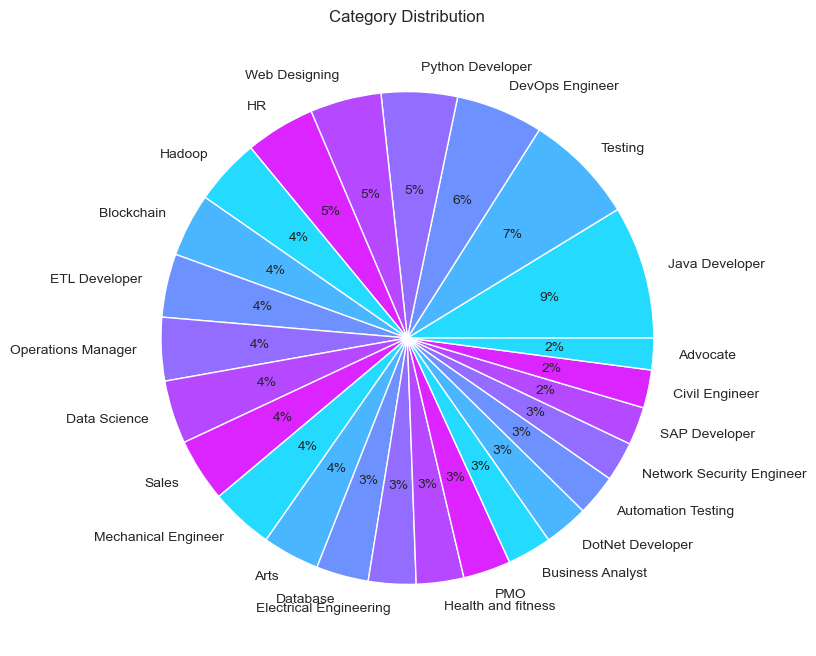

In [16]:
counts = df['Category'].value_counts()
plt.figure(figsize = (12,8))
plt.pie(counts, labels=Category['index'], colors = sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

###Cleaning Data###


*   URLs
*   Hashtags
*   Mentions
*   Special Letters
*   Punctuations





In [17]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

##Word Cloud

In [47]:
pip install pdfplumber

  Obtaining dependency information for pdfplumber from https://files.pythonhosted.org/packages/c1/f9/1a41afffe5e7a98ab9b6a6dd3dab9d99b677fae2536f676397c4506f6554/pdfplumber-0.10.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
      --------------------------------------- 0.1/5.6 MB 1.9 MB/s eta 0:00:03
     - -------------------------------------- 0.1/5.6 MB 1.7 MB/s eta 0:00:04
     - -------------------------------------- 0.1/5.6 MB 1.7 MB/s eta 0:00:04
     - -------------------------------------- 0.1/5.6 MB 1.7 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.6 MB 871.5 kB/s eta 0:00:07
     - -------------------------------------- 0.2/5.6 MB 888.4 kB/s eta 0:00:07
     - -------------------------------------- 0.3/5.6 MB 944.1 kB/s eta 0:00:06
     -- ------------------------------------- 0.3/5.6 MB 981.5 kB/s eta 0:00:06
     -- ------------------------------------- 0.4/5.6 MB 1.1 MB/s eta 0:00:05
     --- ----

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
import string
# from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [48]:
!pip install pdfplumber

#Words in to categorical vales

In [23]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [24]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

#Vectorization

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

#Spliting


In [26]:
print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


#Now let's train the model and print classification report

In [27]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9896373056994818

In [29]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

#Prediction system

In [38]:
myresume = """Azhar Ali
 PO# Odero lal station district & taluka Matiari, Sindh, 70090
 03229036085
 azhar.ali.sahowal@gmail.com
Azhar Ali is a skilled professional in the fields of Data Science and Machine
Learning. With a passion for uncovering insights from data, Azhar has honed
expertise in various data analysis and machine learning techniques. Eager to
contribute knowledge and skills in a real-world setting, Azhar is actively seeking
opportunities for employment or internships. With a strong foundation in data-driven
decision-making, Azhar is poised to make a meaningful impact in the world of data
science.
Govt. Higher secondary school Odero lal station
Matriculation
668- A Grade
Govt. Higher secondary school Odero lal station
Intermediate
762- B grade
University of Sindh, Jamshoro
BS Computer Science
3.2 CGPA
Python Programming
OOPs
Machine Learning
Data Science
Natural Language Precessing (NLP)
Deep Learning CNNs RNNs
Resume Screening (IBA Bootcamp)
"Resume Screening using Data Science and Machine Learning," is a cutting-edge
solution that harnesses the power of advanced technologies to streamline the
hiring process. By leveraging data science and machine learning algorithms, this
project efficiently sifts through resumes, identifying top candidates based on
predefined criteria.
Telemedicine as my (FYP)
Developing predictive model to aid doctors in diagnosing diseases based on
symptoms and medical history.
Data Science Certified from IBM through Coursera.
Data Science with Python from IBA readyness Bootcamp program"""

In [31]:
import pickle

In [34]:
with open('clf.pkl','wb') as file:
    pickle.dump(clf,file)
    

In [35]:
with open('word_vectorizer','wb') as file1:
    pickle.dump(word_vectorizer,file1)

In [36]:
#loading models
clf = pickle.load(open('clf.pkl','rb'))

In [39]:
#clean the input resume
cleaned_resume = cleanResume(myresume)

In [40]:
input_features = word_vectorizer.transform([cleaned_resume])

In [41]:
 prediction_id = clf.predict(input_features)[0]

In [42]:
#maping category ID to category name....
category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }


In [45]:
category_name = category_mapping.get(prediction_id, "Unknown")
print("Category Name:", category_name)

Category Name: Data Science


In [44]:
prediction_id

6